# Flush memory

In [126]:
import torch
torch.cuda.empty_cache()

# Imports and Setup

In [6]:
import numpy as np 
import pandas as pd 
import os

dataset = r"D:\Code\ML_Project\dataset"
for dirname, _, filenames in os.walk(dataset):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\Code\ML_Project\dataset\NUSW-NB15_features.csv
D:\Code\ML_Project\dataset\NUSW-NB15_GT.csv
D:\Code\ML_Project\dataset\The UNSW-NB15 description.pdf
D:\Code\ML_Project\dataset\UNSW-NB15_1.csv
D:\Code\ML_Project\dataset\UNSW-NB15_2.csv
D:\Code\ML_Project\dataset\UNSW-NB15_3.csv
D:\Code\ML_Project\dataset\UNSW-NB15_4.csv
D:\Code\ML_Project\dataset\UNSW-NB15_LIST_EVENTS.csv
D:\Code\ML_Project\dataset\Training and Testing Sets\UNSW_NB15_testing-set.csv
D:\Code\ML_Project\dataset\Training and Testing Sets\UNSW_NB15_testing-set.parquet
D:\Code\ML_Project\dataset\Training and Testing Sets\UNSW_NB15_training-set.csv
D:\Code\ML_Project\dataset\Training and Testing Sets\UNSW_NB15_training-set.parquet


# Load dataset

In [8]:
import pandas as pd

# Load the datasets with different encoding for the problematic file
train_df = pd.read_csv(r"D:\Code\ML_Project\dataset\Training and Testing Sets\UNSW_NB15_training-set.csv")
test_df = pd.read_csv(r"D:\Code\ML_Project\dataset\Training and Testing Sets\UNSW_NB15_testing-set.csv")
event_df = pd.read_csv(r"D:\Code\ML_Project\dataset\UNSW-NB15_LIST_EVENTS.csv")


features_df = pd.read_csv(r"D:\Code\ML_Project\dataset\NUSW-NB15_features.csv", encoding='ISO-8859-1')

# Feature Details

In [12]:
features_df

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [15]:
train_df 

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


# Basic Data preprocesssing

## Dataset columns

In [19]:
num = train_df.select_dtypes(include=["float64", "int64"])
len(num.columns)

41

In [44]:
def countColumns(df, name=''):
    # Identify the data types of columns
    column_data_types = df.dtypes
    
    # Count the numerical and categorical columns
    numerical_count = 0
    categorical_count = 0
    if name:
        name += '-'
    for column_name, data_type in column_data_types.items():
        if np.issubdtype(data_type, np.number):
            numerical_count += 1
        else:
            categorical_count += 1
    
    # Print the counts
    print(f"There are {numerical_count} Numerical Columns in {name}dataset")
    print(f"There are {categorical_count} Categorical Columns in {name}dataset")
countColumns(train_df, 'training')
countColumns(test_df, 'testing')

There are 41 Numerical Columns in training-dataset
There are 4 Categorical Columns in training-dataset
There are 41 Numerical Columns in testing-dataset
There are 4 Categorical Columns in testing-dataset


## Find duplicate records


In [47]:
print("Duplicates in train_df: ",train_df.duplicated().sum())
train_df = train_df.drop_duplicates()
print("Duplicates in test_df: ",test_df.duplicated().sum())
test_df = test_df.drop_duplicates()

Duplicates in train_df:  0
Duplicates in test_df:  0


## Find missing values

In [49]:
missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values" })
print(missing_data)
missing_data = test_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values" })
print(missing_data)

                   Total No. of Missing Values
id                                           0
dur                                          0
proto                                        0
service                                      0
state                                        0
spkts                                        0
dpkts                                        0
sbytes                                       0
dbytes                                       0
rate                                         0
sttl                                         0
dttl                                         0
sload                                        0
dload                                        0
sloss                                        0
dloss                                        0
sinpkt                                       0
dinpkt                                       0
sjit                                         0
djit                                         0
swin         

## Handling ct_ftp_cmd

In [55]:
def ct_ftp_cmf_handle(df):
    # Convert to string explicitly
    df.loc[:, 'ct_ftp_cmd'] = df['ct_ftp_cmd'].astype(str)
    
    # Replace spaces or empty strings with '0' safely
    df.loc[:, 'ct_ftp_cmd'] = df['ct_ftp_cmd'].str.strip().replace('', '0')
    
    # Convert back to integer (ensuring everything is a valid number)
    df.loc[:, 'ct_ftp_cmd'] = df['ct_ftp_cmd'].astype(int)

ct_ftp_cmf_handle(train_df)
ct_ftp_cmf_handle(test_df)

C:\Users\Chetanya Jolly\AppData\Local\Temp\ipykernel_17120\155591056.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '0']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'ct_ftp_cmd'] = df['ct_ftp_cmd'].astype(str)
C:\Users\Chetanya Jolly\AppData\Local\Temp\ipykernel_17120\155591056.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '0']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'ct_ftp_cmd'] = df['ct_ftp_cmd'].astype(str)


## Handling is_ftp_login

In [60]:
def convert_to_binary(df, column):
    df.loc[:, column] = (df[column] > 0).astype(int)
    return df

# Define the column name
column = 'is_ftp_login'

# Call the function
train_df = convert_to_binary(train_df, column)
test_df= convert_to_binary(test_df, column)

In [66]:
countColumns(train_df)
countColumns(test_df)

There are 40 Numerical Columns in dataset
There are 5 Categorical Columns in dataset
There are 40 Numerical Columns in dataset
There are 5 Categorical Columns in dataset


# EDA

## Check Outliers

In [70]:
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
len(numerical_columns)

40

In [77]:
train_df = train_df.fillna(0)  # Replace NaNs with 0
test_df = test_df.fillna(0)  # Replace NaNs with 0

C:\Users\Chetanya Jolly\AppData\Local\Temp\ipykernel_17120\3827687630.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df = test_df.fillna(0)  # Replace NaNs with 0


In [80]:
# Drop the specified columns from both train_df and test_df
columns_to_drop = ['proto','state', 'service']
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

In [83]:
#Checking the categorical columns 
cat_train_columns = train_df.select_dtypes(include=['O']).columns.tolist()
cat_test_columns = test_df.select_dtypes(include=['O']).columns.tolist()
print(cat_train_columns, cat_test_columns) 

['attack_cat'] ['attack_cat']


## Target feature Encoding

In [86]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
ohe = OneHotEncoder()
train_df['attack_cat'] = label_encoder.fit_transform(train_df['attack_cat'])
test_df['attack_cat'] = label_encoder.fit_transform(test_df['attack_cat'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'Analysis': 0, 'Backdoor': 1, 'DoS': 2, 'Exploits': 3, 'Fuzzers': 4, 'Generic': 5, 'Normal': 6, 'Reconnaissance': 7, 'Shellcode': 8, 'Worms': 9}


## Checking Highly Correlated Features

<Axes: title={'center': 'Correlation Plot'}>

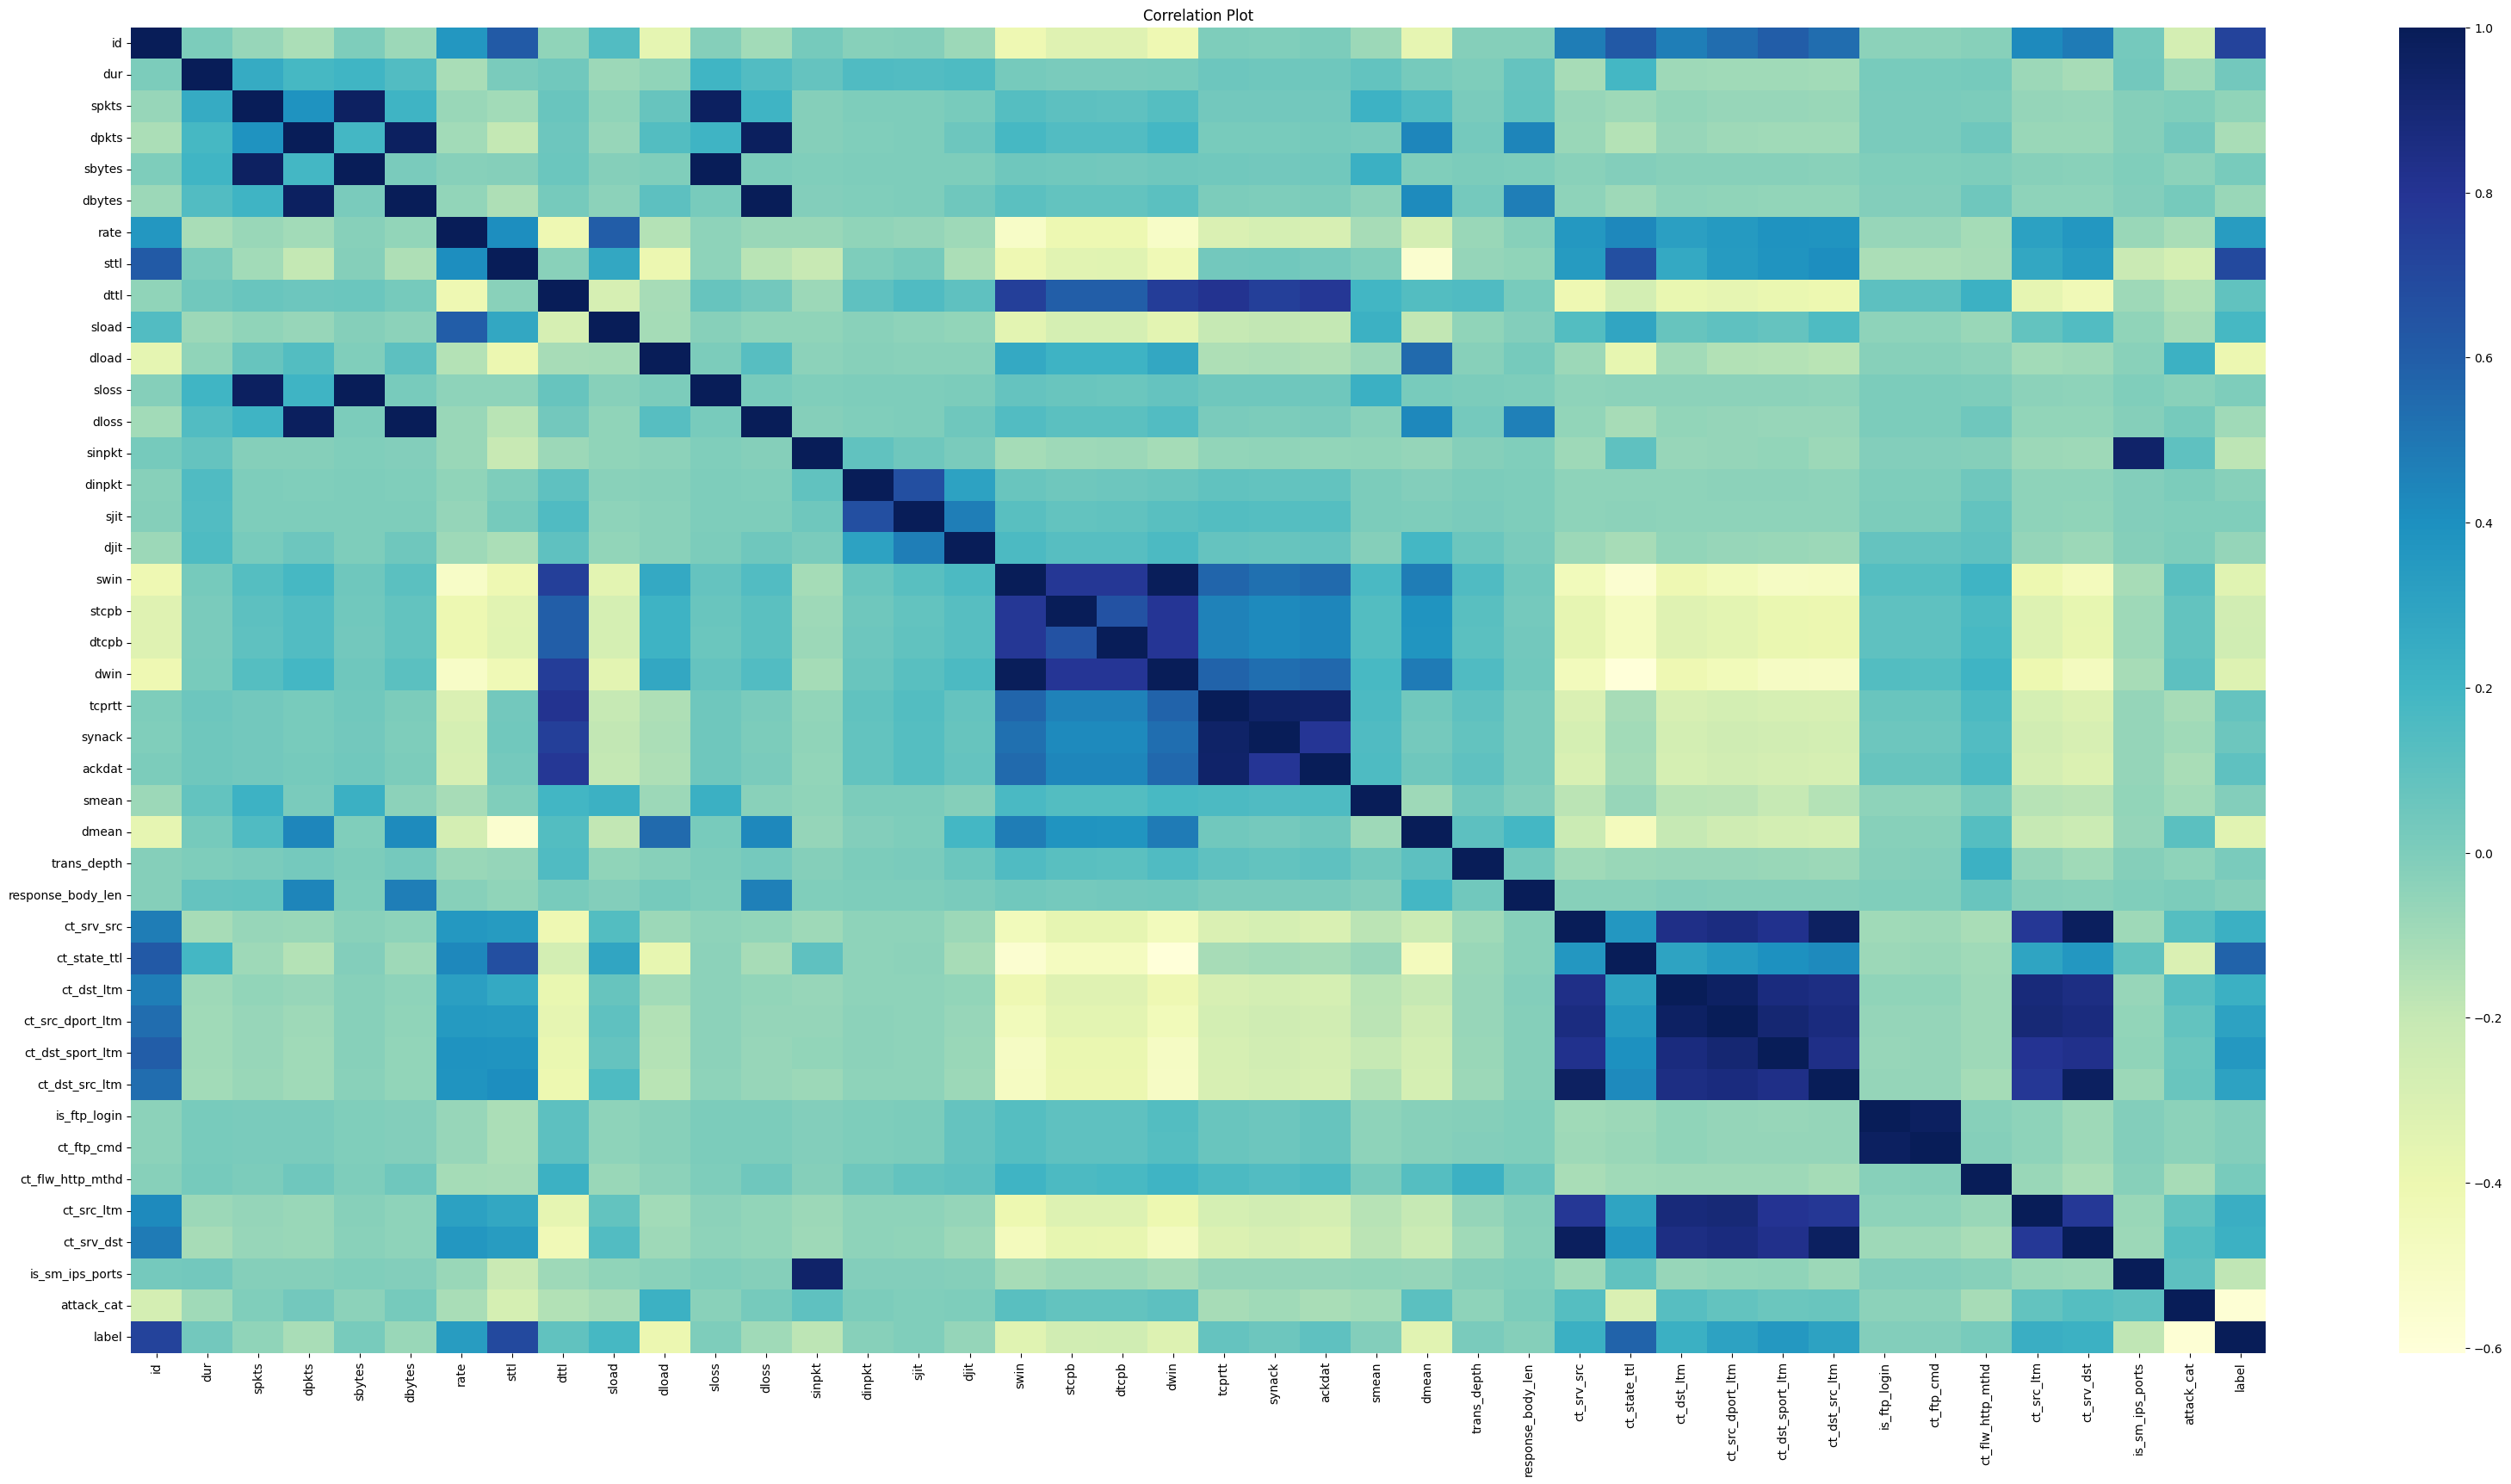

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(train_df.corr(),cmap='YlGnBu')

In [99]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:


## Drop highly corelated features

In [93]:
# Create a set of features to drop
features_to_drop = set()

# Iterate over the highly correlated features and add one of each pair to the drop list
for feature1, feature2 in highly_correlated_features:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # You can choose feature1 or feature2 to drop

# Drop the features from the DataFrame
train_df = train_df.drop(columns=features_to_drop)
test_df = test_df.drop(columns=features_to_drop)

# Print the remaining features
print("Remaining features after dropping highly correlated ones:")
print(train_df.columns)
print(test_df.columns)
train_df.columns == test_df.columns

Remaining features after dropping highly correlated ones:
Index(['id', 'dur', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl', 'sload', 'dload',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'synack', 'smean', 'dmean',
       'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl',
       'is_ftp_login', 'ct_flw_http_mthd', 'attack_cat', 'label'],
      dtype='object')
Index(['id', 'dur', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl', 'sload', 'dload',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'synack', 'smean', 'dmean',
       'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl',
       'is_ftp_login', 'ct_flw_http_mthd', 'attack_cat', 'label'],
      dtype='object')


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [95]:
num_rows = train_df.shape[0]  # Number of rows
print("Total Rows:", num_rows)

Total Rows: 175341


# SMOTE

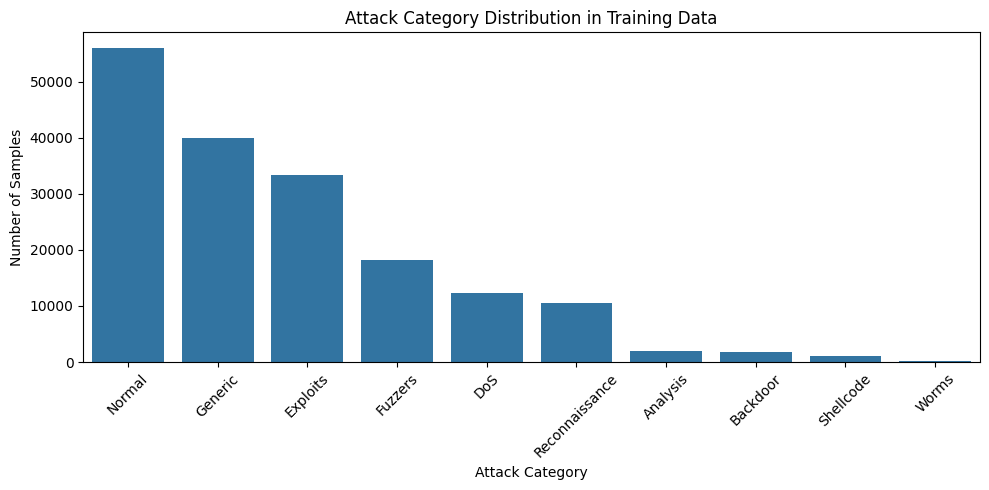

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your label mapping
label_mapping = {
    0: 'Analysis',
    1: 'Backdoor',
    2: 'DoS',
    3: 'Exploits',
    4: 'Fuzzers',
    5: 'Generic',
    6: 'Normal',
    7: 'Reconnaissance',
    8: 'Shellcode',
    9: 'Worms'
}

# Map numeric labels to names
train_df['attack_cat_name'] = train_df['attack_cat'].map(label_mapping)

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(x='attack_cat_name', data=train_df, order=train_df['attack_cat_name'].value_counts().index)
plt.title("Attack Category Distribution in Training Data")
plt.xlabel("Attack Category")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [101]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pandas as pd

X = train_df.drop(columns=['attack_cat'])  
y = train_df['attack_cat']  

# Define the desired number of samples for each class
desired_count = 20000

# Correct way to define oversample and undersample strategies
oversample_strategy = {label: desired_count for label, count in y.value_counts().items() if count < desired_count}
undersample_strategy = {label: desired_count for label, count in y.value_counts().items() if count > desired_count}

# Create the SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy=oversample_strategy)
undersample = RandomUnderSampler(sampling_strategy=undersample_strategy)

# Combine SMOTE and RandomUnderSampler in a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

# Apply the pipeline to resample the dataset
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Print class distribution before and after resampling
print("\nBefore resampling:\n", y.value_counts())
print("\nAfter resampling:\n", y_resampled.value_counts())


# Make sure y_resampled is a DataFrame or Series
# If y_resampled is a Series, turn it into a DataFrame first
y_resampled = pd.DataFrame(y_resampled, columns=["attack_cat"])

# Concatenate along columns (axis=1)
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

# Now resampled_df looks just like your original train_df
print(resampled_df.shape)
print(resampled_df.head())



Before resampling:
 attack_cat
6    56000
5    40000
3    33393
4    18184
2    12264
7    10491
0     2000
1     1746
8     1133
9      130
Name: count, dtype: int64

After resampling:
 attack_cat
0    20000
1    20000
2    20000
3    20000
4    20000
5    20000
6    20000
7    20000
8    20000
9    20000
Name: count, dtype: int64
(200000, 25)
          id       dur  spkts  dpkts         rate  sttl  dttl        sload  \
47932  47933  0.000009      2      0  111111.1072   254     0   88888888.0   
47936  47937  0.000009      2      0  111111.1072   254     0   88888888.0   
47938  47939  0.000008      2      0  125000.0003   254     0  100000000.0   
47940  47941  0.000008      2      0  125000.0003   254     0  100000000.0   
47941  47942  0.000008      2      0  125000.0003   254     0  100000000.0   

       dload  sinpkt  ...  smean  dmean  trans_depth  response_body_len  \
47932    0.0   0.009  ...    100      0            0                  0   
47936    0.0   0.009  ...    100 

# Train-Test-split

## Spliting Data for Transformer

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

numeric_col = [col for col in resampled_df.columns if col not in 'attack_cat']
resampled_df[numeric_col] = resampled_df[numeric_col].astype(float)

# Assuming X is your feature set and y is your target variable
train, val = train_test_split(
    resampled_df, 
    random_state=42, 
    test_size=0.2,
    stratify=resampled_df['attack_cat']
)
test = test_df.copy()

# Display the shape of the resulting datasets
print("Training Features Shape:", train.shape)
print("Test Features Shape:", test.shape)
print("Validation Shape:", val.shape)

Training Features Shape: (160000, 25)
Test Features Shape: (82332, 25)
Validation Shape: (40000, 25)


In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160000 entries, 223644 to 254342
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 160000 non-null  float64
 1   dur                160000 non-null  float64
 2   spkts              160000 non-null  float64
 3   dpkts              160000 non-null  float64
 4   rate               160000 non-null  float64
 5   sttl               160000 non-null  float64
 6   dttl               160000 non-null  float64
 7   sload              160000 non-null  float64
 8   dload              160000 non-null  float64
 9   sinpkt             160000 non-null  float64
 10  dinpkt             160000 non-null  float64
 11  sjit               160000 non-null  float64
 12  djit               160000 non-null  float64
 13  swin               160000 non-null  float64
 14  synack             160000 non-null  float64
 15  smean              160000 non-null  float64
 16  dm

In [155]:
train['attack_cat'].unique()

array([7, 1, 9, 4, 8, 6, 2, 3, 5, 0])

# Model Building

## Transformers

### Build and Train

In [130]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)
from sklearn.metrics import classification_report
import torch
from omegaconf import DictConfig, ListConfig
from omegaconf.base import ContainerMetadata
from typing import Any

# Circumventing the weight_only=true
torch.serialization.clear_safe_globals()
torch.serialization.add_safe_globals([DictConfig, ListConfig, ContainerMetadata, Any])

#----------------- Data Configuration ------------#
categorical_columns = ["is_ftp_login"]
continuous_columns = list(set(train.columns) - set(categorical_columns) -set('attack_cat'))
print(len(continuous_columns), len(train.columns))
data_config = DataConfig(
    target=["attack_cat"],  # target should always be a list.
    continuous_cols = continuous_columns,
    categorical_cols = categorical_columns,
)


#----------------- Trainer Configuration ---------#
trainer_config = TrainerConfig(
    auto_lr_find=True,  # Runs the LRFinder to automatically derive a learning rate
    batch_size=128,
    max_epochs=20,
    load_best=False,
)
optimizer_config = OptimizerConfig()

#----------------- Model Configuration --------#
model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="1024-512-512",  # Number of nodes in each layer
    activation="LeakyReLU",  # Activation between each layers
    learning_rate=1e-3,
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)


# Train model
tabular_model.fit(
    train=train,
    validation=val,
)

tabular_model.save_model(dir = r"D:\anaconda_projects\ML_PROJECT\dl_techniques\saved_models_changed", inference_only=False)

24 25


2025-10-31 19:25:55,234 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42


2025-10-31 19:25:55,311 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-10-31 19:25:55,380 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
classification task

D:\anaconda3\envs\unsw_trans\lib\site-packages\pytorch_tabular\categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
D:\anaconda3\envs\unsw_trans\lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.87038828  0.87038828 -1.21854359 ...  1.5666989  -1.21854359
  1.5666989 ]' has dtype incompatible with int32, please explicitly cas

2025-10-31 19:25:55,684 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: CategoryEmbeddingModel

2025-10-31 19:25:55,873 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-10-31 19:25:55,908 - {pytorch_tabular.tabular_model:656} - INFO - Auto LR Find Started

D:\anaconda3\envs\unsw_trans\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:654: Checkpoint directory D:\anaconda_projects\ML_PROJECT\dl_techniques\saved_models exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\anaconda3\envs\unsw_trans\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
D:\anaconda3\envs\unsw_trans\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Trainer was signaled to stop but the required `min_epochs=1` or `min_steps=None` has not been met. Training will continue...
`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0004365158322401656
Restoring states from the checkpoint path at D:\anaconda_projects\ML_PROJECT\dl_techniques\.lr_find_6f397315-22e4-4767-87aa-714e594f564a.ckpt
Restored all states from the checkpoint at D:\anaconda_projects\ML_PROJECT\dl_techniques\.lr_find_6f397315-22e4-4767-87aa-714e594f564a.ckpt


2025-10-31 19:25:59,760 - {pytorch_tabular.tabular_model:669} - INFO - Suggested LR: 0.0004365158322401656. For    
plot and detailed analysis, use `find_learning_rate` method.

2025-10-31 19:25:59,773 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  815 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │     54 │ train │
│ 2 │ head             │ LinearHead                │  5.1 K │ train │
│ 3 │ loss             │ CrossEntropyLoss          │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 820 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 820 K                                                                                                
Total estimated model params size (MB): 3                                                                          
Modules in train mode: 17                                                                                          
Modules in eval mode: 0

Output()

2025-10-31 19:30:38,469 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-10-31 19:30:38,476 - {pytorch_tabular.tabular_model:1575} - WARNING - Directory is not empty. Overwriting the 
contents.

### Load and Evaluate

In [133]:
from pytorch_tabular import TabularModel
model = TabularModel.load_model(r"D:\anaconda_projects\ML_PROJECT\dl_techniques\saved_models_changed", map_location=None, strict=True)

2025-10-31 19:35:39,209 - {pytorch_tabular.tabular_model:171} - INFO - Experiment Tracking is turned off

2025-10-31 19:35:39,235 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [135]:
model.summary()

   | Name                                       | Type                      | Params | Mode 
--------------------------------------------------------------------------------------------------
0  | _backbone                                  | CategoryEmbeddingBackbone | 815 K  | train
1  | _backbone.linear_layers                    | Sequential                | 815 K  | train
2  | _backbone.linear_layers.0                  | Linear                    | 27.6 K | train
3  | _backbone.linear_layers.1                  | LeakyReLU                 | 0      | train
4  | _backbone.linear_layers.2                  | Linear                    | 524 K  | train
5  | _backbone.linear_layers.3                  | LeakyReLU                 | 0      | train
6  | _backbone.linear_layers.4                  | Linear                    | 262 K  | train
7  | _backbone.linear_layers.5                  | LeakyReLU                 | 0      | train
8  | _embedding_layer                           | Embedding1dLay

In [137]:
tabular_model.evaluate(test)

D:\anaconda3\envs\unsw_trans\lib\site-packages\pytorch_tabular\categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
D:\anaconda3\envs\unsw_trans\lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.36652157 -0.36652157 -0.36652157 ... -0.36652157 -0.36652157
 -0.36652157]' has dtype incompatible with int64, please explicitly cas

Output()

D:\anaconda3\envs\unsw_trans\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.7667856812477112     │
│         test_loss         │    2.5518603324890137     │
│        test_loss_0        │    2.5518603324890137     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss_0': 2.5518603324890137,
  'test_loss': 2.5518603324890137,
  'test_accuracy': 0.7667856812477112}]

In [139]:
predicted = model.predict(test)

D:\anaconda3\envs\unsw_trans\lib\site-packages\pytorch_tabular\categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
D:\anaconda3\envs\unsw_trans\lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.36652157 -0.36652157 -0.36652157 ... -0.36652157 -0.36652157
 -0.36652157]' has dtype incompatible with int64, please explicitly cas

In [157]:
predicted.sample(5)

,attack_cat_-1.5666989036012806_probability,attack_cat_-1.2185435916898848_probability,attack_cat_-0.8703882797784892_probability,attack_cat_-0.5222329678670935_probability,attack_cat_-0.17407765595569785_probability,attack_cat_0.17407765595569785_probability,attack_cat_0.5222329678670935_probability,attack_cat_0.8703882797784892_probability,attack_cat_1.2185435916898848_probability,attack_cat_1.5666989036012806_probability,attack_cat_prediction
14130,2.322347e-19,3.052366e-18,2.928255e-12,7.022571e-06,9.999862e-01,8.287116e-07,1.230377e-11,5.931966e-06,1.742907e-08,1.928063e-13,-0.174078
36880,9.055685e-10,1.633709e-10,1.335126e-09,2.422698e-08,1.035357e-11,3.709790e-13,1.000000e+00,2.080733e-13,3.080349e-13,3.530048e-13,0.522233
4353,5.661259e-06,1.900072e-02,9.768165e-01,4.175790e-03,9.397759e-07,6.816971e-10,3.949160e-07,6.264583e-10,6.765128e-08,3.830628e-08,-0.870388
17456,1.104708e-16,2.228152e-16,1.580235e-11,7.861197e-06,9.999874e-01,2.488509e-06,8.406866e-10,2.165971e-06,1.336169e-07,8.231181e-12,-0.174078
24929,3.119662e-10,9.945700e-11,1.579116e-11,2.894641e-10,1.024055e-13,2.191361e-15,1.000000e+00,1.150985e-14,6.242754e-14,2.935199e-14,0.522233


In [151]:
predicted.columns

Index(['attack_cat_-1.5666989036012806_probability',
       'attack_cat_-1.2185435916898848_probability',
       'attack_cat_-0.8703882797784892_probability',
       'attack_cat_-0.5222329678670935_probability',
       'attack_cat_-0.17407765595569785_probability',
       'attack_cat_0.17407765595569785_probability',
       'attack_cat_0.5222329678670935_probability',
       'attack_cat_0.8703882797784892_probability',
       'attack_cat_1.2185435916898848_probability',
       'attack_cat_1.5666989036012806_probability', 'attack_cat_prediction'],
      dtype='object')

In [166]:
class_map = {
    -1.5666989036012806: 0,
    -1.2185435916898848: 1,
    -0.8703882797784892: 2,
    -0.5222329678670935: 3,
    -0.17407765595569785: 4,
     0.17407765595569785: 5,
     0.5222329678670935: 6,
     0.8703882797784892: 7,
     1.2185435916898848: 8,
     1.5666989036012806: 9
}

predicted['attack_cat_prediction_decoded'] = predicted['attack_cat_prediction'].map(class_map)

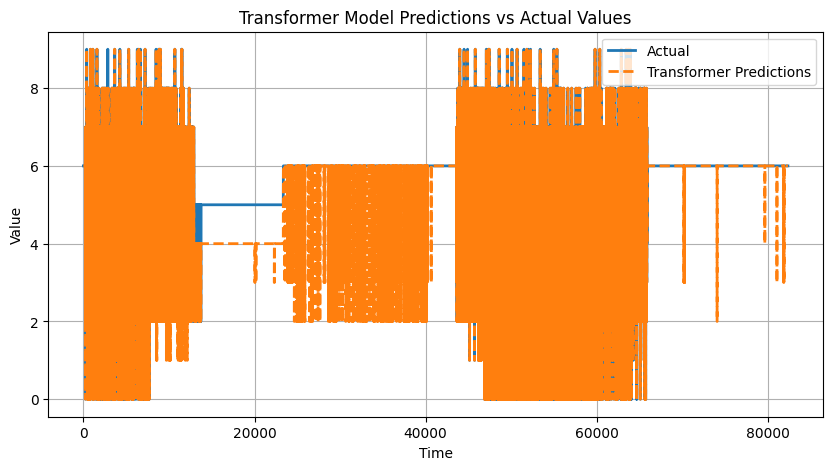

In [168]:
import matplotlib.pyplot as plt

# Example data
y_true = test['attack_cat']
y_pred = predicted['attack_cat_prediction_decoded']

timestamps = range(len(y_true))
plt.figure(figsize=(10, 5))

# Plot true values
plt.plot(timestamps, y_true, label='Actual', linewidth=2)

# Plot model predictions
plt.plot(timestamps, y_pred, label='Transformer Predictions', linestyle='--', linewidth=2)

# Labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Transformer Model Predictions vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()


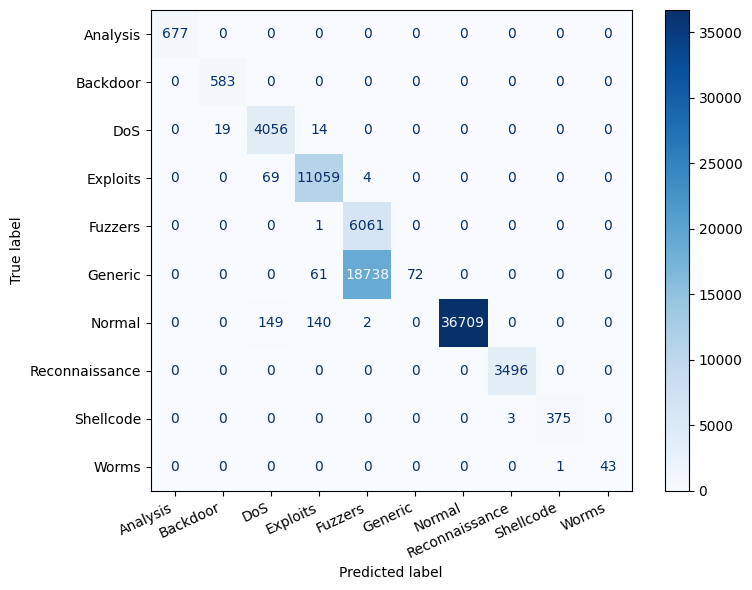

Classification Report:
                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       677
      Backdoor       0.97      1.00      0.98       583
           DoS       0.95      0.99      0.97      4089
      Exploits       0.98      0.99      0.99     11132
       Fuzzers       0.24      1.00      0.39      6062
       Generic       1.00      0.00      0.01     18871
        Normal       1.00      0.99      1.00     37000
Reconnaissance       1.00      1.00      1.00      3496
     Shellcode       1.00      0.99      0.99       378
         Worms       1.00      0.98      0.99        44

      accuracy                           0.77     82332
     macro avg       0.91      0.90      0.83     82332
  weighted avg       0.94      0.77      0.72     82332



In [193]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Your label mapping
label_mapping = {
    0: 'Analysis',
    1: 'Backdoor',
    2: 'DoS',
    3: 'Exploits',
    4: 'Fuzzers',
    5: 'Generic',
    6: 'Normal',
    7: 'Reconnaissance',
    8: 'Shellcode',
    9: 'Worms'
}

# Convert to list for display
labels = [label_mapping[i] for i in sorted(label_mapping.keys())]

# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", ax=ax, colorbar=True)
plt.setp(ax.get_xticklabels(), rotation=25, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

# Classification Report (with names)
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))



In [195]:
torch.save(tabular_model.model.state_dict, 'transformer_changed.pt')